### Imports

In [1]:
# For loading from cmbml directory (temporary solution)
import sys
import os

repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, repo_root)

In [2]:
import hydra
from hydra import compose, initialize
from omegaconf import DictConfig, OmegaConf
os.environ['CMB_ML_LOCAL_SYSTEM'] = 'generic_lab'
hydra.core.global_hydra.GlobalHydra.instance().clear() # if re-initialize is needed, clear the global hydra instance (in case of multiple calls to initialize)

initialize(version_base=None, config_path="../cfg")

cfg = compose(config_name='config_comp_models.yaml')

In [3]:
from pathlib import Path

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from cmbml.utils.get_planck_data import get_planck_obs_data

import matplotlib.cm as cm

In [4]:
# This is a bit more convoluted than it needs to be, but will suffice.
planck_maps_dir = Path(cfg.local_system.assets_dir) / "Planck"

In [5]:
variance_map_fp = get_planck_obs_data(100, planck_maps_dir)  # This will download the data if it doesn't exist
variance_map = hp.read_map(variance_map_fp, field=4)

# Paper Figure: Variance map

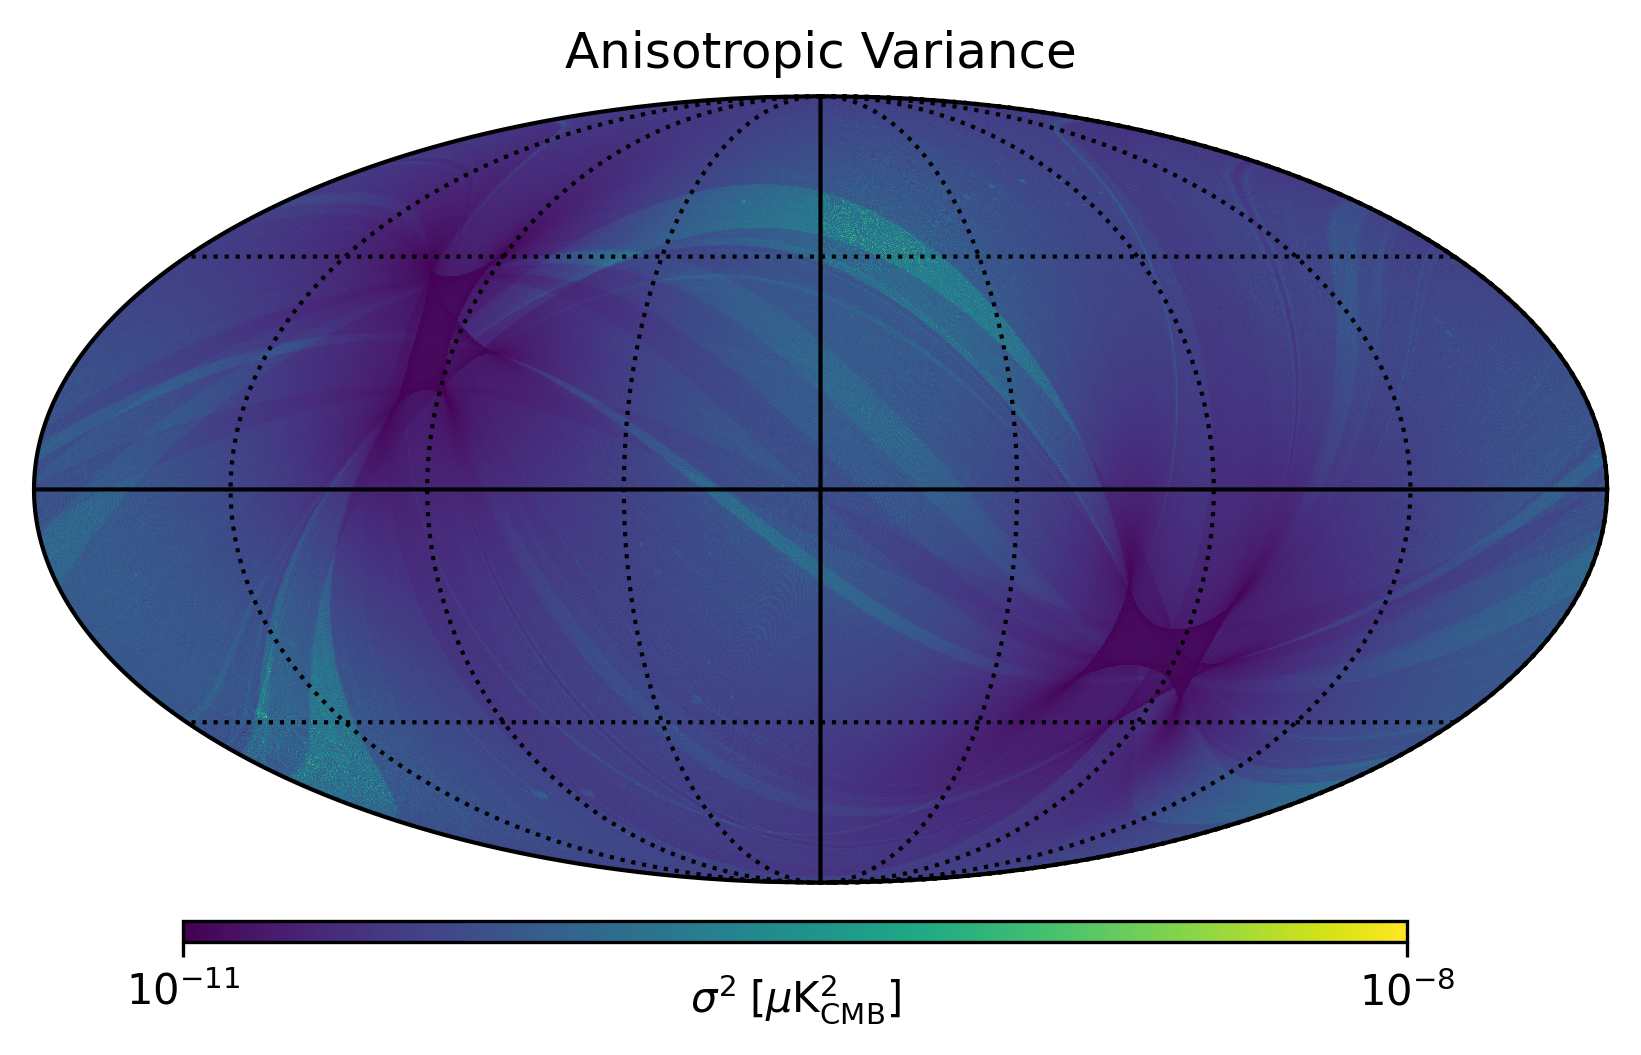

In [6]:
fig = plt.figure(figsize=(6.8,4.5), dpi=300)

cmap = 'viridis'

map_unit = "K_CMB^2"

norm = cm.colors.Normalize(vmin=1e-11, vmax=1e-8)

hp.mollview(norm(variance_map), title=f"Anisotropic Variance", xsize=2400, min=0, max=1, cbar=False, cmap=cmap, unit=map_unit, hold=True)  #, min=-300, max=300, xsize=2000, cmap=colombi1_cmap)
hp.graticule(dpar=45, dmer=45)

cax = fig.add_axes([0.2, 0.16, 0.6, 0.015])
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
cb = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cb.locator = MaxNLocator(nbins=2)
cb.update_ticks()
cb.set_ticks([1e-11, 1e-8])
cb.set_ticklabels(["$10^{-11}$", "$10^{-8}$"])
cb.set_label('$\\sigma^2 \\; [\\mu \\text{K}_\\text{CMB}^2]$', labelpad=-10)
plt.savefig("anisotropic_variance.pdf", format="pdf", bbox_inches="tight")

In hindsight, the standard deviation map is more clear, highlighting the regions of lowest variance. It also has units that (may) make more sense. Oh well.

In [7]:
sd_map = np.sqrt(variance_map)

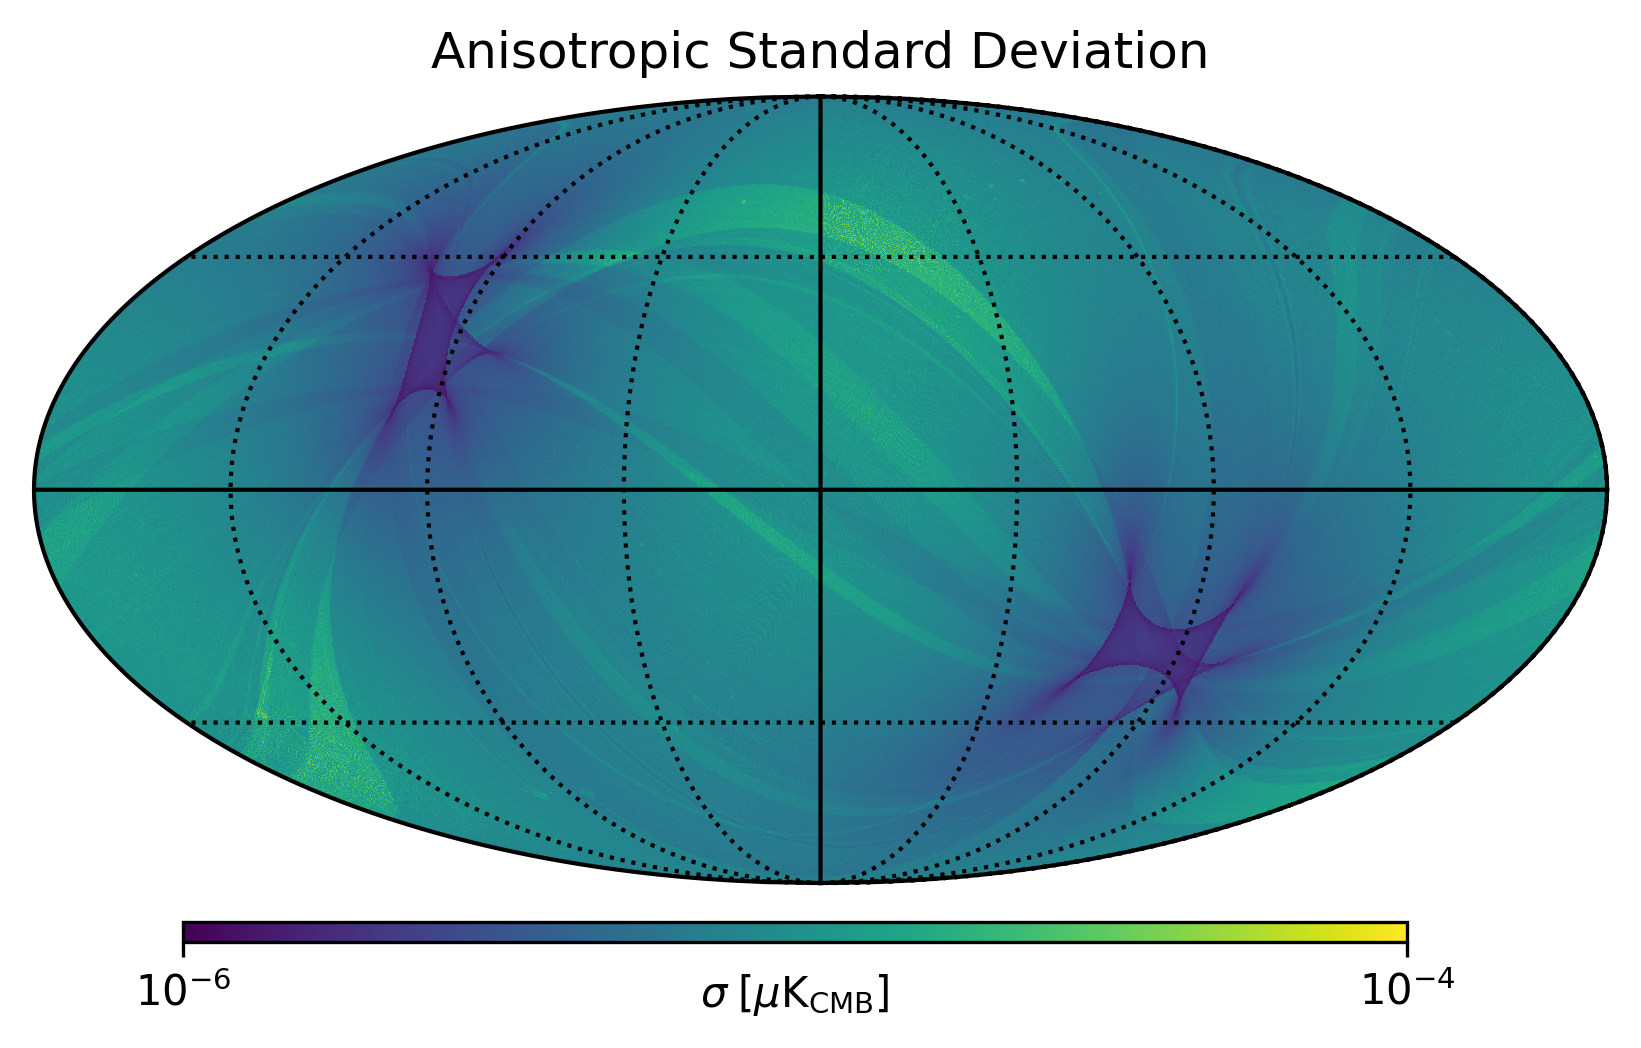

In [8]:
fig = plt.figure(figsize=(6.8,4.5), dpi=300)

cmap = 'viridis'

map_unit = "K_CMB^2"

norm = cm.colors.Normalize(vmin=1e-6, vmax=1e-4)

hp.mollview(norm(sd_map), title=f"Anisotropic Standard Deviation", xsize=2400, min=0, max=1, cbar=False, cmap=cmap, unit=map_unit, hold=True)  #, min=-300, max=300, xsize=2000, cmap=colombi1_cmap)
hp.graticule(dpar=45, dmer=45)

cax = fig.add_axes([0.2, 0.16, 0.6, 0.015])
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
cb = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cb.locator = MaxNLocator(nbins=2)
cb.update_ticks()
cb.set_ticks([1e-6, 1e-4])
cb.set_ticklabels(["$10^{-6}$", "$10^{-4}$"])
cb.set_label('$\\sigma \\; [\\mu \\text{K}_\\text{CMB}]$', labelpad=-10)
plt.savefig("anisotropic_standard_deviation.pdf", format="pdf", bbox_inches="tight")